In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

mu = [[20,20], [16,16], [24,24]]
sigma_increase = [[10,9],[9,10]]
sigma_decrease = [[10,-9],[-9,10]]

num_of_clusters = 3
i = 0
c1 = np.random.multivariate_normal(mu[0], sigma_increase, 200)
c2 = np.random.multivariate_normal(mu[1], sigma_decrease, 200)
c3 = np.random.multivariate_normal(mu[2], sigma_decrease, 200)

X = np.append(c1,c2, axis = 0)
X = np.append(X,c3, axis = 0)

y1 = np.repeat(1,200)
y2 = np.repeat(2,200)
y3 = np.repeat(3,200)

plt.plot(c1.T[0],c1.T[1],'r.')
plt.plot(c2.T[0],c2.T[1],'b.')
plt.plot(c3.T[0],c3.T[1],'g.')

In [2]:
X = np.concatenate([c1,c2,c3],axis=0)

y = np.concatenate([y1,y2,y3],axis=0)

In [3]:
y.shape

(600,)

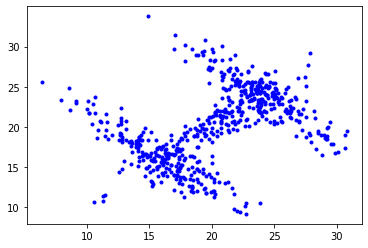

In [4]:
plt.plot(X[:,0],X[:,1],'b.')

In [5]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

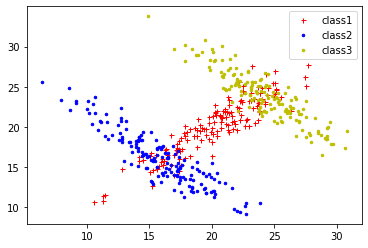

In [8]:
def plotData(X, y):
    """Plots the data points X and y into a new figure """
    
    y = y.flatten()
    class1 = y==1
    class2 = y==2
    class3 = y==3
    plt.figure(figsize=(6,4))    
    plt.plot(X[:,0][class1], X[:,1][class1], "r+", markersize=5, label='class1')
    plt.plot(X[:,0][class2], X[:,1][class2], "b.", markersize=5, label='class2')    
    plt.plot(X[:,0][class3], X[:,1][class3], "y.", markersize=5, label='class3')
    plt.legend()
    # shorter but not as clear
    # plt.plot(X[:,0][pos], X[:,1][pos], 'k+', X[:,0][neg], X[:,1][neg], 'yo', markersize=15)  

plotData(X_train, y_train)

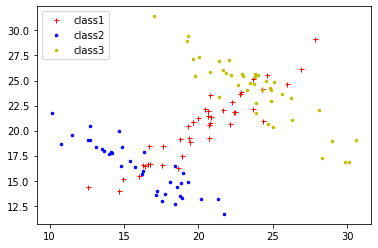

In [9]:
plotData(X_test, y_test)

In [13]:
def svmTrainLinear(X, y, C, kernelFunction, tol=1e-3, max_passes=-1, sigma=0.1):
    """Trains an SVM classifier"""    
    y = y.flatten()
    clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2,decision_function_shape='ovo')
    return clf.fit(X, y)       

    
def visualizeBoundaryLinear(X, y, model):
    """Plots a linear decision boundary learned by the SVM"""
    
    plotData(X, y) 
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - (w[0] * xp + b) / w[1]
    plt.plot(xp, yp, 'b-')   
    plt.show()


[LibSVM]

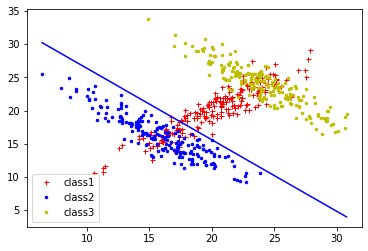

In [14]:
C = 0.1
linear_model = svmTrainLinear(X_train, y_train, C, "linear")
visualizeBoundaryLinear(X, y, linear_model)

In [15]:
linear_model

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=2)

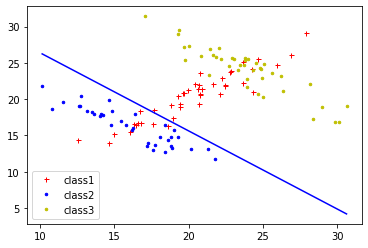

In [16]:
visualizeBoundaryLinear(X_test, y_test, linear_model)

In [27]:
def visualizeBoundaryNonLinear(X, y, model):
    """Plots a non linear decision boundary learned by the SVM"""
    
    plt.figure(figsize=(10,8))
    plotData(X, y)
    X_21,X_22 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
    plt.contour(X_21,X_22,rbk_model.predict(np.array([X_21.ravel(),X_22.ravel()]).T).reshape(X_21.shape),1,colors="k")
    plt.legend()
    plt.show()    

<Figure size 720x576 with 0 Axes>

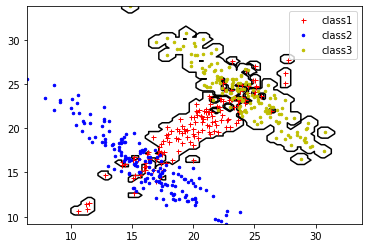

In [28]:
rbk_model = SVC(kernel="rbf",gamma=10, C=10,decision_function_shape='ovo')
rbk_model.fit(X_train,y_train.ravel())
# plotting the decision boundary
visualizeBoundaryNonLinear(X_train, y_train, rbk_model)

In [29]:
rbk_model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 720x576 with 0 Axes>

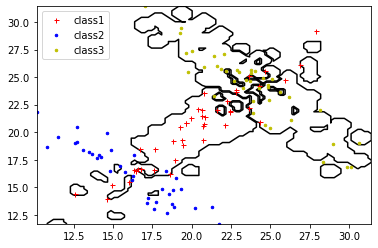

In [30]:
visualizeBoundaryNonLinear(X_test, y_test, rbk_model)

C controls the cost of misclassification on the training data.
Small C makes the cost of misclassificaiton low ("soft margin"), thus allowing more of them for the sake of wider "cushion".

Large C makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.

The goal is to find the balance between "not too strict" and "not too loose". Cross-validation and resampling, along with grid search, are good ways to finding the best C.

|          | large gamma | small gamma | large c | small c |
|----------|-------------|-------------|---------|---------|
| variance | low         | high        | high    | low     |
| bias     | high        | low         | low     | high    |

## Using parameter tuning

In [49]:
def hyperParamTuning(X, y, Xval, yval,vals):
    """
    Returns your choice of C and gamma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    best_accuracy = 0
    best_c=0
    best_gamma=0        
    iterations = 1
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            #default classifier rbf is used
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)            
            accuracy = classifier.score(Xval,yval)            
            if accuracy>best_accuracy:
                best_accuracy = accuracy
                best_c =C
                best_gamma=gamma
            iterations = iterations + 1
    return best_c, best_gamma, best_accuracy


In [64]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma, best_accuracy = hyperParamTuning(X_train, y_train.ravel(), X_test, y_test.ravel(),vals)
clf_best_hyper = SVC(C=C,gamma=gamma)
clf_best_hyper.fit(X_train,y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
clf_best_hyper

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
rbk_model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 720x576 with 0 Axes>

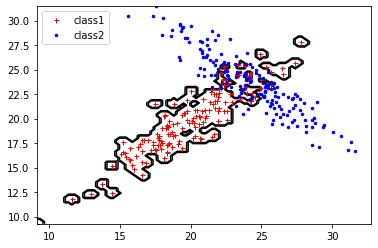

In [69]:
visualizeBoundaryNonLinear(X_train, y_train, clf_best_hyper)

<Figure size 720x576 with 0 Axes>

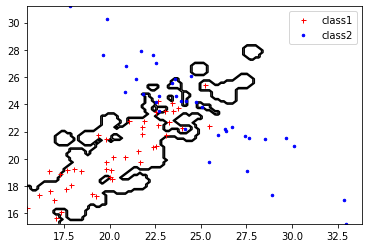

In [70]:
visualizeBoundaryNonLinear(X_test, y_test, clf_best_hyper)